# Лекция 9. Матричные функции и матричные уравнения

## На прошлой лекции

- Свёртка и преобразование Фурье
- Тёплицевы матрицы, циркулянты
- Алгоритм быстрого преобразования Фурье
- Матрицы с малым рангом смещения (low-displacement rank)

## План на сегодня

- Матричные функции
- Матричная экспонента 
- Алгоритмы вычисления матричных функций
- Матричные уравнения

Книга по теме: [Functions of matrices by Nick Higham](http://www.google.ru/books?hl=ru&lr=&id=2Wz_zVUEwPkC&oi=fnd&pg=PR3&dq=Higham+matrix+function&ots=pTt6fpLGRX&sig=DgUuX-SpBZGin8CFUo-4MYnOcHE&redir_esc=y#v=onepage&q=Higham%20matrix%20function&f=false)

## Простейшая матричная функция: матричный полином

Матричный полином имеет очень простой вид

$$ P(A) = \sum_{k=0}^n c_k A^k. $$

[Теорема Гамильтона-Кэли](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D0%BC%D0%B8%D0%BB%D1%8C%D1%82%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%9A%D1%8D%D0%BB%D0%B8) утверждает, что $F(A) = 0$ где $F(\lambda) = \det(A - \lambda I)$.

## Матричный полином как способ построения любой матричной фугнкции

Можно определить функцию от матрицы с помощью ряда Тейлора:  

$$ f(A) = \sum_{k=0}^{\infty} c_k A^k. $$

Сходимость означает как сходимость в некоторой **матричной норме**.  

Примером такого ряда является ряд Неймана

$$ (I - F)^{-1} = \sum_{k=0}^{\infty} F^k, $$

который определён для $\rho(F) < 1$.

## Ряд для матричной экспоненты

Наиболее известной матричной функцией является **матричная экспонента**. В скалярном случае ряд выглядит следующим образом  

$$ e^x = 1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \ldots = \sum_{k=0}^{\infty} \frac{x^k}{k!}, $$

и он напрямую обобщается на матричный случай:  

$$ e^A = \sum_{k=0}^{\infty} \frac{A^k}{k!}. $$

Этот ряд всегда сходится, так как выполнено следующее равенство

$$\sum_{k=0}^{\infty} \frac{\Vert A \Vert^k}{k!} = e^{\Vert A \Vert}.$$

## Почему матричная экспонента важна?

Огромное количество прикладных задач сводится к системе обыкновенных дифференциальных уравнений вида

$$ \frac{dy}{dt} = Ay, \quad y(0) = y_0. $$


## Обыкновенные дифференциальные уравнения и матричная экспонента

- Дано уравнение

$$\frac{dy}{dt} = Ay, \quad y(0) = y_0.$$

- Формально решение задаётся выражением $y(t) = e^{At} y_0$, поэтому если известна $e^{At}$ (или мы можем быстро умножить матричную экспоненту на вектор), то решение можно получить гораздо быстрее по сравнению с методами, основанными на шагах по времени  
- Действительно,

$$\frac{d}{dt} e^{At} = \frac{d}{dt} \sum_{k=0}^{\infty} \frac{t^k A^k}{k!} = \sum_{k=1}^{\infty} \frac{t^{k-1} A^{k}}{(k-1)!}  = A e^{At}.$$

## Матричная экспонента и шаги по времени

Матричная экспонента может быть гораздо лучше, чем решение с помощью, например, схемы Эйлера:

$$\frac{dy}{dt} \approx \frac{y_{k+1} - y_k}{\tau} = A y_k, \quad y_{k+1} = y_k + \tau A y_k,$$

если мы знаем как вычислить произведение матричной экспоненты на вектор, используя только произведения матрицы $A$ на вектор.

Для плотных матриц матричная экспонента даёт **точный** ответ для ОДУ в любой момент времени $t$ по сравнению с приближённым решением, полученным из схемы Эйлера или схожих подходов.

## Как вычислять матричные функции, включая матричную экспоненту?

- Существует очень много методов даже для матричной экспоненты!

- См. статью [C. Van Loan, C. Moler, Nineteen Dubious Ways to Compute the Exponential of a Matrix, Twenty-Five Years Later](http://www.cs.cornell.edu/cv/researchpdf/19ways+.pdf)

- Самый простой метод – это диагонализация матрицы:  

$$ A = S \Lambda S^{-1}, $$

где столбцы $S$ – собственные векторы матрицы $A$, тогда

$$ F(A) = S F(\Lambda) S^{-1}. $$

**Проблема: диагонализация неустойчива!** (и не любая матрица диагонализуема)

Далее короткое демо

In [1]:
import numpy as np
eps = 1e-4
p = 4
a = np.eye(p)
for i in range(p-1):
    a[i, i+1] = 1
    
a[p-1, 2] = eps
print(a)
val, vec = np.linalg.eig(a)
#print a
print(np.linalg.norm(a - vec.dot(val[:, np.newaxis] * np.linalg.inv(vec))))
#print 'S * D * S^{-1}:' 
print(vec.dot(val[:, np.newaxis] * np.linalg.inv(vec)))

[[1.e+00 1.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 1.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+00 1.e+00]
 [0.e+00 0.e+00 1.e-04 1.e+00]]
16384.000030517578
[[1.00000000e+00 0.00000000e+00 9.09494702e-13 1.63840000e+04]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e-04 1.00000000e+00]]


Сейчас мы вычислим матричную экспоненту с помощью диагонализации от **возмущённой Жордановой клетки**.

In [2]:
import numpy as np
eps = 1e-16
p = 5
a = np.eye(p)
for i in range(p-1):
    a[i, i+1] = 1
    
a[p-1, 0] = eps
a = np.array(a)
val, vec = np.linalg.eig(a)
print(np.linalg.norm(a - vec.dot(np.diag(val)).dot(np.linalg.inv(vec))))

fun = lambda x: np.exp(x)

#Using diagonalization
fun_diag = vec.dot(np.diag(fun(val))).dot(np.linalg.inv(vec))


#Using Schur
import scipy.linalg
fun_m = scipy.linalg.expm(a)
print('Difference = {}'.format(np.linalg.norm(fun_m - fun_diag)))

2.0
Difference = 5.959978842992802


## Как работает функция ```funm```?

- Матричная экспонента – это особая функция, и для её вычисления существуют специальные методы.  

- Для произвольной функции $F$, есть замечательный **алгоритм Шура-Парлетта**, который основан для **теореме Шура**

## Алгоритм Шура-Парлетта

- Для данной матрицы $A$ мы хотим вычислить $F(A)$, и можем вычислить $F$ только в **скалярных точках**

- Сначала сведём матрицу $A$ к **треугольной форме**  

$$ A = U T U^*. $$

- Поэтому  $F(A)=U F(T) U^*$

- Нам осталось вычислить функцию от треугольной матрицы.

## Вычисление функции от треугольных матриц

- Мы знаем значения на диагоналях

$$ F_{ii} = F(T_{ii}), $$

также мы знаем, что

$$ F T = T F, $$

то есть значение матричной функции **коммутирует** с самой матрицей. 

- Матричная функция от треугольной матрицы есть треугольная матрица.
- Используя известные значения на главной диагонали и свойство коммутативности, мы получим последовательно остальные диагонали:

$$f_{ij} = t_{ij} \frac{f_{ii} - f_{jj}}{t_{ii} - t_{jj}} + \sum_{k=i+1}^{j-1} \frac{f_{ik} t_{kj} - t_{ki}f_{kj}}{t_{ii} - t_{jj}}.$$

## Матричные функции: ещё одно определение

- Одним из способов определение матричной функции $f(A)$ является использование **канонической формы Жордана**.

- Более элегантный способ определить матричные функции – это использовать **интегральное представление Коши:**

$$
    f(A) = \int_{\Gamma} f(z) (zI - A)^{-1} dz,
$$

где $f(z)$ аналитическая функция на границе и внутри замкнутого контура $\Gamma$, который покрывает спектр матрицы $A$.

- Определение можно обобщить на случай **операторов**

## Важные матричные функции

- Матричная экспонента используется для решения ОДУ $\frac{dy}{dt} = Ay$ в явном виде $y = e^{At}y_0.$
- $\cos(A), \sin(A)$ используются для решения волнового уравнения $\frac{d^2 y}{dt^2} + Ay = 0.$
- Функция знака, $\mathrm{sign}(A)$, используется для вычисления **спектральных проекций.**
- Обратный квадратный корень из матрицы $A^{-1/2}$ необходим в различных задачах, например, для генерирования сэмплов из нормального распределения

## И снова матричная экспонента

- Матричная функция задаётся следующим рядом:

$$e^A = I + A + \frac{1}{2} A^2 + \frac{1}{3!} A^3 + \ldots$$

- Использовать этот ряд для вычисления – плохая идея (даже для скалярного случая, почему?)

In [16]:
import numpy as np

x = -30.0 #Point
k = 1000000 #Number of terms
b = 1.0
x0 = x
for i in range(1, k):
    b += x0
    x0 *= x/(i+1)
    
print('Error in the exponent: {}'.format((b - np.exp(x))/np.exp(x)))

Error in the exponent: 65220007.32064143


## Сходимость ряда

- Сходимость ряда для матричной экспоненты может быть медленной для больших значений $x$ (то есть для большой нормы матрицы).

- Что мы можем сделать?

## Использовать Крыловские пространства

- Мы можем использовать идею Крыловских методов: с помощью метода Арнольди генерировать ортогональный базис в Крыловском подпространстве и вычислить (это можно делать в общем случае для любой функции)

$$ f(A)v \approx f(Q H Q^*)v = Q f(H) Q^*v,$$

где $H$ небольшая верхне-Гессенбергова матрица, для вычисления функции от которой мы можем использовать, например **алгоритм Шура-Парлетта**

- Сходимость Крыловского метода может быть очень медленной, так как по сути это **полиномиальная аппроксимация** матричной функции.

- А сходимость полиномиальной аппроксимации может быть **очень медленной**

- **Идея:** заменить полиномы рациональными функциями!

## Аппроксимация Паде

- Матричная экспонента хорошо приближается **рациональными функециями**:  

$$
\exp(x) \approx \frac{p(x)}{q(x)},
$$

где $p(x)$ и $q(x)$ полиномы, тогда вычисление рациональной матричной функции сводится к **матричным произведениям** и **обращаениям матриц**

- Рациональная функция также удобна в случае, когда необходимо вычислить только произведение матричной экспоненты на вектор, поскольку вычисление в этом случае сводится к **умножению матрицы на вектор** и **решению систем линейных уравнений**

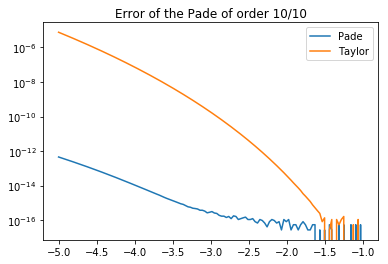

In [13]:
#Computing Pade approximant
import numpy as np
import mpmath
%matplotlib inline
from mpmath import pade, taylor, polyval
import matplotlib.pyplot as plt
x = np.linspace(-5, -1, 128)
a = taylor(mpmath.exp, 0, 20) #Taylor series
k1 = 10
k2 = 10
p, q = pade(a, k1, k2) #Pade approximant
plt.plot(x, polyval(p[::-1], x)/polyval(q[::-1], x) - np.exp(x), label="Pade")
plt.semilogy(x, polyval(a[::-1], x) - np.exp(x), label="Taylor")
plt.legend()
_ = plt.title('Error of the Pade of order {0:d}/{1:d}'.format(k1, k2) )

## Алгоритм scaling & squaring 

Канонический алгоритм вычисления матричной экспоненты опирается на масштабирование (scaling) матрицы $A$:

$$\exp(A) = \exp(A/2^k)^{(2^k)}.$$

В этом случае матрица имеет малую норму, что приводит к следующему алгоритму:

- Получить матрицу $B := A/2^k$ с нормой меньше 1 – шаг scaling
- Вычислить матричную экспоненту $C = e^B$ с помощью аппроксимации Паде
- Получить $e^A \approx C^{(2^k)}$ с помощью $k$ матричных произведений – шаг squaring

## Матричная экспонента для матриц большой размерности

- Для матриц большого размера нельзя использовать алгоритм scaling-squaring, так как в нём надо работать с плотными матрицами, поэтому мы можем использовать Крыловские методы или (что лучше) **рациональные** Крыловские методы

- Идея рациональных Крыловских методов опирается на идею рациональной аппроксимации вместо полиномиальной

- Обычные Крыловские методы опираются на полиномиальную аппроксимацию

## Рациональные Крыловские подпространства

- Простой и эффективный подход основан на, так называемых, **расширенных Крыловских подпространствах**:

$$KE(A, b) = \mathrm{Span}(\ldots, A^{-2} b, A^{-1} b, b, A b, A^2 b, \ldots)$$

- На каждом шаге добавляется векторы вида $A w$ и $A^{-1} w$ в подпространство и результат ортогонализуется (**рациональный метод Арнольди**).

- То есть нам нужно только решить одну линейную систему на каждом шаге, но если матрица не меняется её можно один раз факторизовать и использовать факторизацию на всех последующих итерациях.

## Рациональный Крыловский метод

Рациональные Крыловские методы являются наиболее эффективными для вычисления произведения матричной функции на вектор:

- Построим ортогональный базис в пространстве

$$KE(A, b) = \mathrm{Span}(\ldots, A^{-2} b, A^{-1} b, b, A b, A^2 b, \ldots)$$

- И вычислим

$$f(A)b \approx Q f(H) Q^*b,$$

где $H = Q^* A Q.$

Этот метод требует одного решения линейной системы и умножения матрицы на вектор на каждой итерации.

## Применение к вычислению расстояний между многообразиями

- Представим два многообразия $\mathcal{M}$ и $\mathcal{N}$ как облака точек
- Построим два графа из этих облаков точек
- Для каждого графа можно построить свой Лапласиан ($L_{\mathcal{M}}$ и $L_{\mathcal{N}}$) (вспомните лекцию о векторе Фидлера!)
- Heat kernel trace 

$$\mathrm{hkt}_{\mathcal{M}}(t) = \mathrm{trace}(\exp(-t L_{\mathcal{M}}))$$

содержит всю информацию о спектре графа

- Расстояние Громова-Вассерштайна между многообразиями $\mathcal{M}$ и $\mathcal{N}$:

$$d_{GW}(\mathcal{M}, \mathcal{N}) \geq \sup_{t > 0} \exp(-2(t + t^{-1}))|\mathrm{hkt}_{\mathcal{M}}(t) - \mathrm{hkt}_{\mathcal{N}}(t)|$$

### Стохастическая оценка следа

- Hutchinson [предложил](https://www.tandfonline.com/doi/abs/10.1080/03610919008812866) следующий метод для оценки следа матрицы

$$ \mathrm{trace}(A) = \mathbb{E}_{p(x)}(x^{\top}Ax), $$

где $p(x)$ некоторое распределение с нулевым средним и единичной дисперсией, например стандартное нормальное распределение или распределение Радемахера

- Для оценки следа нам нужно уметь быстро умножать матрицу на вектор!
- И тут рациональные Крыловские подпространства вступают в игру, так как $\mathrm{hkt}$ требует вычисления следа от матричной экспоненты

### Расстояние между языками ([картинка из статьи](https://openreview.net/pdf?id=HyebplHYwB))

<img src="./gw_matexp.png">

## Другие матричные функции

Теперь кратко обсудим другие матричные функции:

- знак (sign)
- обратный квадратный корень

## Функция знак (sign)

- Функция знак (sign) определена как

$$\mathrm{sign}(x) = \begin{cases} 1, \quad x > 0, \\ -1, \quad x < 0. \end{cases}$$

- Для данной матрицы $A = U \Lambda U^*$ функция знак отображает все собственные значения больше $0$ в $1$, а все собственные значения меньше $0$ в $-1$, то есть

$$P = \frac{(I + \mathrm{sign}(A))}{2}$$

является проектором на подпространство натянутое на все собственные векторы для положительных собственных значений. 

- Такие проекторы могут быть очень полезными при вычислениях собственных значений для матриц большой размерности, если нужно найти только подпространство для собственных векторов

## Как вычислить функцию знак?

- Для вычисления этой функции есть очень простой итерационный метод

$$X_{k+1} = \frac{1}{2} (X_k + X^{-1}_k), X_0 = \alpha A.$$

- Этот метод сходится **квадратично** к функции знака.

- Также можно использовать полиномиальный метод, [предложенный R. Byers](http://www.sciencedirect.com/science/article/pii/0024379587902229)

$$X_{k+1} = \frac{1}{2} X_k (3 I - X_k), \quad X_0 = \alpha A.$$

## Функция матричного знака: приложение

- Одним из важных приложений этой матричной функции является решение алгебраического уравнения Рикатти

$$A^* X + X A - X R X + G = 0,$$

которое возникает в задачах оптимального и стохастического управления.

- Решение этого уравнения эквивалентно поиску устойчивого инвариантного подпространства (то есть соответствующего отрицательным собственным значениям) для матрицы 

$$
    C = \begin{bmatrix} A^* & G \\ R & -A \end{bmatrix}.
$$

## Обратный квадратный корень матрицы

- Обратный квадратный корень матрицы $A^{-1/2}$ также очень важная матричная функция.

- Многомерное нормальное распределение с ковариационной матрицей $A = A^* > 0$ задаётся с помощью 

$$e^{A^{-1} x, x}.$$

- Пусть $x$ вектор большой размерности (миллионы), как сгенерировать сэмпл из нормального распределения с данной **структурированной** ковариационной матрицей $A$?

- Простейший алгоритм – это сгенерировать вектор $y$ из стандартного нормального распределения, а затем вычислить 

$$x = A^{-\frac{1}{2}} y.$$

- Таким образом, вектор $x$ будет из соответствующего распределения.

- Рациональные Крпыловские подпространства особо эффективны для вычисления квадратного корня из матрицы

## Матричные уравнения

- Уравнение вида

$$F(X) = G, \quad X \in \mathbb{R}^{n \times m}$$ 

называется **маричным уравнением**.

- Линейным матричным уравнением называется такое уравнение, в котором $X$ и $G$ матрицы, и $F$ линейный оператор.

## Два важных матричных уравнения

Обсудим два матричных уравнения:

- **уравнение Сильвестра**

$$ A X + X B = C,$$

где $A$ и $B$ данные матрицы, и его частный случай, **непрерывное уравнение Ляпунова**,

$$ A X + XA^{\top} = C,$$

и 

- **дискретное уравнение Ляпунова**

$$A X A^* - X = C. $$

## Приложение для уравнения Ляпунова

- Уравнение Ляпунова очень важно для определения устойчивости динамических систем и для снижения сложности моделей.

$$\frac{dy}{dt} = Ay, \quad y(0) = y_0,$$

$$y(t) \rightarrow 0$$ 

для $t \rightarrow \infty$.

- Система устойчива, iff для любой $Q = Q^* > 0$ существует единственное положительно определённое решение $P$ уравнения Ляпунова

$$A P + P A^* = Q.$$

- То есть устойчивость также может быть определена без вычисления собственных значений.

## Приложение к снижению сложности модели

Дана линейная инвариантная по времени система:

$$\frac{dx}{dt} = Ax + Bu, \quad y = C x,$$

где $x$ – **состояние**, $u$ – управление, и $y$ – наблюдение. Хотим аппроксимировать её с помощью линейной системы меньшей размерности

$$
   \frac{d\widehat{x}}{dt} = \widehat{A} \widehat{x} + \widehat{B} u, \quad y = \widehat{C} \widehat{x},
$$

таким образом, чтобы наблюдения приближённой системы были близки к наблюдению исходной системы (большой размерности).

Оптимальные $\widehat{A}, \widehat{B}, \widehat{C}$ могут быть восстановлены из решения вспомогательного уравнения Ляпунова.

## Кронекерово произведение: напоминание

Кронекерово произведение двух матриц $A \in \mathbb{R}^{n_1 \times m_1}$ и $B \in \mathbb{R}^{n_2 \times m_2}$ – это матрица $C$ размера $(n_1 n_2) \times (m_1 m_2)$ состоящая из блоков 

$$A \otimes B = [a_{ij} B].$$

## Главное свойство Кронекерова произведения и оператора $\mathrm{vec}$

$$\mathrm{vec}(A X B^{\top}) = (B \otimes A) \mathrm{vec}(X).$$

## Перепишем уравнение Сильвестра

$$\mathrm{vec}(A X B^{\top}) = (B \otimes A) \mathrm{vec}(X).$$

- Тогда уравнение Сильвестра 

$$ A X + X B = C $$ 

примет вид

$$\mathrm{vec}(AX  + X B) =  (I \otimes A + B^{\top} \otimes I) \mathrm{vec}(X) = \mathrm{vec}(C).$$

- То есть нам нужно решить линейную систему с матрицей

$$(I \otimes A + B^{\top} \otimes I)$$

- Это матрица размера $n^2$, и метод Гаусса потребует $\mathcal{O}(n^6)$ операций.

- Однако мы можем решить это уравнение за $\mathcal{O}(n^3)$ операций!

## Решение уравнение Сильвестра: метод Bartels-Stewart

$$(I \otimes A + B^{\top} \otimes I) x = c.$$

- Вычислим разложение Шура от матриц $A$ и $B$:

$$A = Q_A T_A Q^*_A, \quad B^{\top} = Q_B T_B Q^*_B.$$

- Тогда мы имеем

$$(I \otimes A + B^{\top} \otimes I) = (I \otimes ( Q_A T_A Q^*_A ) + (Q_B T_B Q^*_B \otimes I) = (Q_B \otimes Q_A) ( I \otimes T_A + T_B \otimes I) (Q^* _B \otimes Q^*_A). $$

- А также

$$(Q_B \otimes Q_A)^{-1} = Q^*_B \otimes Q^*_A,$$

то есть нам нужно решить вспомогательную линейную систему с матрицей

$$I \otimes T_A + T_B \otimes I.$$

- Заметим, что если $A$ и $B$ эрмитовы, то $T_A$ и $T_B$ диагональные, и вся матрица также диагональная!

## Решение итоговой системы

У нас есть следующая система

$$(I \otimes T_A + T_B \otimes I) z = g,$$

в матричном виде

$$T_A Z + Z T^{\top}_B = G.$$

Тогда мы просто запишем уравнения поэлементно и увидим, что они успешно решаются для $Z_{11}, Z_{21}, \ldots, $.

## Резюме

- Матричные функции: матричная экспонента, методы для её вычисления, другие матричные функции
- Матричные уравнения (уравнения Ляпунова и Сильвестра)

## 21 декабря в 13:00 презентации проектов!

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()